## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
duplicate_mice_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
# check the mouse data for ID
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mice)==False]
clean_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean_volume = clean_mice_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median_volume = clean_mice_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variance_volume = clean_mice_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
stdev_volume = clean_mice_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem_volume = clean_mice_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
summary_table = pd.DataFrame({
    "Mean Tumor Volume" : mean_volume,
    "Median Tumor Volume" : median_volume,
    "Tumor Volume Variance" : variance_volume,
    "Tumor Volume Stdev" : stdev_volume,
    "Tumor Volume SEM" : sem_volume
})
# Preview DataFrame
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_mice_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
clean_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


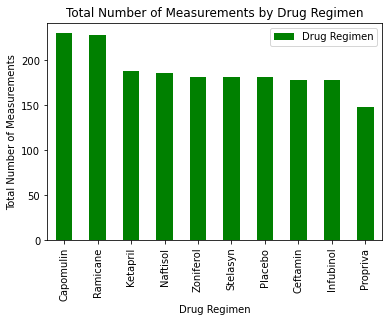

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = clean_mice_data["Drug Regimen"].value_counts()
counts.plot(kind="bar", color="g")
plt.title("Total Number of Measurements by Drug Regimen")
plt.legend()
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

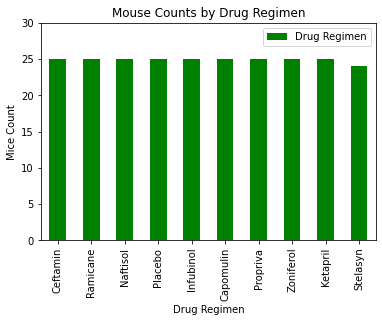

In [11]:
# plot the mouse counts for each drug using pandas
counts = mouse_metadata["Drug Regimen"].value_counts()
counts.plot(kind="bar", color="g")
plt.title("Mouse Counts by Drug Regimen")
plt.legend()
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.ylim(0, max(counts)+5)
plt.show()

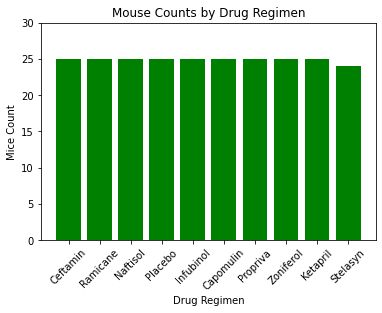

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
x_axis = np.arange(len(summary_table))
x_ticks = [value for value in x_axis]
plt.xticks(x_ticks, counts.index.values, rotation=45)
plt.title("Mouse Counts by Drug Regimen")
plt.bar(counts.index.values, counts.values, color="g")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.ylim(0, max(counts)+5)
plt.show()

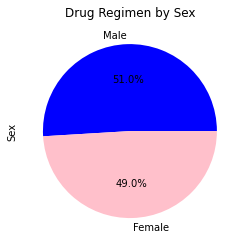

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_mice_data["Sex"].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%", colors = ["blue", "pink"])
plt.title("Drug Regimen by Sex")
plt.show()

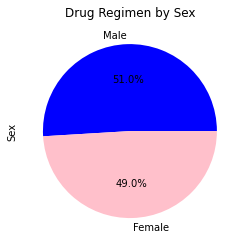

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "pink"]
plt.pie(counts.values, labels=counts.index.values, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Drug Regimen by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_mergeDF = last_timepoint.merge(clean_mice_data, on=["Mouse ID", "Timepoint"], how="left")
last_timepoint_mergeDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drug_list = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = last_timepoint_mergeDF.loc[last_timepoint_mergeDF["Drug Regimen"] == d, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lowerbound) | (final_tumor_volume > upperbound)]
    
    if outliers.empty == True:
        print(f"No Outliers in {d}")
    else:
        print(f"{d}'s potential outliers: \n{outliers}\n") 

Infubinol's potential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

No Outliers in Ceftamin
No Outliers in Ramicane
No Outliers in Capomulin


In [18]:
# Determine outliers using upper and lower bounds
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume for each Drug Regimen is: \n{median_volume}")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume for each Drug Regimen is: 
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


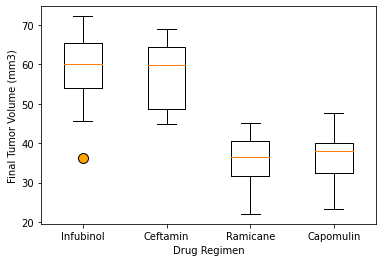

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_colors = dict(markerfacecolor = "orange", markersize = 10)
plt.boxplot(tumor_volume, labels=drug_list, flierprops=outlier_colors)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [20]:
#Generate a table of all mice filtered out by the Capomulin drug regimen
Capomulin_table = clean_mice_data.loc[clean_mice_data["Drug Regimen"]=="Capomulin"]
Capomulin_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


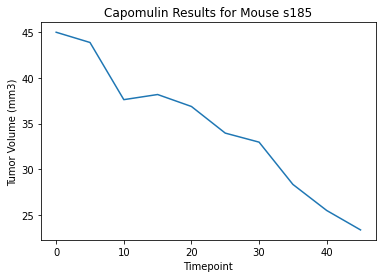

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_s185 = Capomulin_table.loc[Capomulin_table["Mouse ID"]=="s185"]
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Results for Mouse s185")
plt.show()

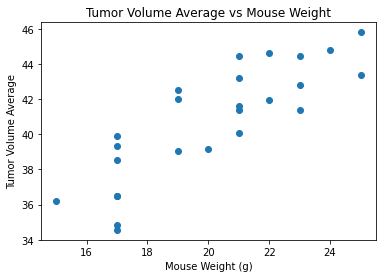

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
Capomulin_avg = Capomulin_table.groupby("Mouse ID").mean()
Capomulin_avg.head()

# establish x-axis value for the weight of the mice
# produce scatter plot of the data
plt.scatter(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)


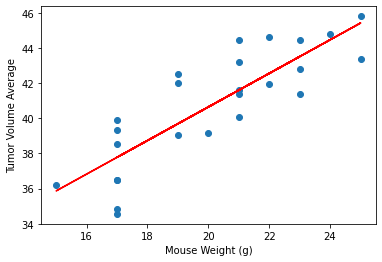

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])[0], 2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between both factors is {correlation:.2f}")

y_values = Capomulin_avg["Weight (g)"] * regression_values[0] + regression_values[1]

# establish linear regression values
regression_values = st.linregress(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])
print(regression_values)

# linear regression line 
plt.plot(Capomulin_avg["Weight (g)"], y_values, color="r")

# scatter plot of the data
plt.scatter(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()